# Simulación de vientos en un edificio de dos pisitos


##Objetivos
###General
Simular el comportamiento de un edificio de dos pisos sometido a vientos para determinar su respuesta, frecuencia de resonancia y desplazamientos máximos.
##Específicos
- Formular un modelo matemático de dos grados de libertad.
- Implementar una función que calcule la energía del sistema y permita encontrar la frecuencia de resonancia.
- Realizar la simulación numérica de los desplazamientos de cada masa.
- Analizar los resultados y evaluar si los desplazamientos se mantienen dentro de límites aceptables.

## Modelo Matematico
### FUNCIÓN DE ENERGÍA A OPTIMIZAR
Se quiere Minimizar E(f), esto maximiza el desplazamiento de la masa 2, para encontrar la frecuencia de resonancia del sistema.

Con la restricción de frecuendia de: $$0.01≤f≤2Hz$$

<br>

f es la variable de decisión a optimizar(se representara por medio de caminata aleatoria).
$$E(f) = -\max_{t \in [t_{estable}, t_{final}]} |x_2(t)|$$
**Donde:**
* x2​(t): Desplazamiento de la masa 2 en función del tiempo
* f: Frecuencia de la fuerza externa
* el tiempo estable comenzara en 20 segundos ya que antes las oscilaciones son irregulares
* el tiempo final lo podramos como 100s

(La funcion la ponemos como negativa por que el programa solo minimiza y buscamos maximizar)

<br>

## DEDUCCIÓN DEL MODELO
        ┌─────┐
        │ m₂  │ ← F(t) = sin(2πft)  [Viento]
        └─────┘
          ║║║  k₂, c₂
          ║║║
        ┌─────┐
        │ m₁  │
        └─────┘
          ║║║  k₁, c₁
          ║║║
        ═══════  [Suelo]
Se tiene 2 masas m1 y m2, conectadas con resortes con constante k1 y k2 y amortiguadores c1 y c2.

Para la masa 1(fuerzas aplicadas):
* Fuerza del resorte 1: $F_{k1}= -k_1x_1$(segun ley de hook)
* Fuerza del amortiguador 1: $F_{c1}= -c_1\dot{x}_1$
* Fuerza resorte 2: $F_{k2}=k_2(x_2-x_1)$
* Fuerza del amortiguador 2: $F_{c2}= c_2(\dot{x}_2-\dot{x}_1)$

Para la masa 2(fuerzas aplicadas):
* Fuerza del resorte 2: $F_{k2}=-k_2(x_2-x_1)$
* Fuerza del amortiguador 2: $F_{c2}= -c_2(\dot{x}_2-\dot{x}_1)$
* Fuerza del viento oscilatoria:  F(t) = $sin(2πft)$

Por lo que:

Masa 1:
$$m_1\ddot{x}= -k_1x_1 - c_1\dot{x}_1 + k_2(x_2-x_1) + c_2(\dot{x}_2-\dot{x}_1) $$

Masa 2:
$$m_2\ddot{x}= -k_2(x_2-x_1) - c_2(\dot{x}_2-\dot{x}_1) + sin(2πft)$$

Estas ecuaciones son de segundo orden por lo que tenemos convertirlas en unas de primer orden.

Ya que son derivadas de posicion sabemos que:
$$aceleracion = \ddot{x} = a$$
$$velocidad = \dot{x} = v$$

Al convertirla a primer orden obtuvimos 4 ecuaciones:

Ecuacion 1:
$$\frac{dx_1}{dt}=v_1$$
Ecuacion 2:
$$\frac{dv_1}{dt}= \frac{-k_1x_1 - c_1v_1 + k_2(x_2-x_1) + c_2(v_2-v_1)}{m_1} $$
Ecuacion 3:
$$\frac{dx_2}{dt}=v_2$$
Ecuacion 4:
$$\frac{dv_2}{dt}= \frac{-k_2(x_2-x_1) - c_2(\dot{x}_2-\dot{x}_1) + sin(2πft)}{m_2} $$

Como ahora son 4 variables define un vector de estados:
$$
y = \begin{bmatrix}
x_1 \\
\dot{x}_1 \\
x_2 \\
\dot{x}_2
\end{bmatrix}
$$


con un estado inicial de: $y(0)=[0, 0, 0, 0]^T$

<br>

## Interpretación Física
Este modelo representa un edificio de 2 pisos donde cada piso es representado por $m_1$ y $m_2$ sometido a fuerzas de viento periódicas:

Los resortes $k_1$ y $k_2$ representan la rigidez estructural de cada piso.

Amortiguadores $c_1$ y $c_2$ representan la disipación de energía.

<br>

El viento es una fuerza periodica con frecuencia variable que se le aplica a $m_2$ es decir al segundo piso. Por medio de la simulacion se busca encontrar esa frecuencia crítica para evaluar si el edificio soporta vientos con esas características.

<br>

## Limitaciones en el modelo
* Asumimos que las fuerzas de los resortes son exactas, es decir un comportamiento lineal, que los resortes no suelen tener.
* La fuerza del viento solo actúa en la masa 2 cuando en la realidad se aplica en todos los puntos del edificio.
* Se asume que la fuerza del viento es perfectamente senoidal.
<br>

## Significado y valor de los parametros

| Parámetro | Significado | Valor | Unidades | Justificación |
|-----------|-------------|-------|----------|---------------|
| $m_1$ | Masa del piso 1 | 1000 | kg | se le dio una masa aproximada de un piso base |
| $m_2$ | Masa del piso 2 | 800 | kg | se le dio una masa aproximada de un segundo piso |
| $k_1$ | Rigidez del piso 1 | 5000 | N/m | se le dio una rigidez estructural mayor para el primer piso|
| $k_2$ | Rigidez del piso 2 | 3000 | N/m | Segundo nivel con menor rigidez |
| $c_1$ | Amortiguamiento piso 1 | 100 | N·s/m | se le dio una disipación típica en estructuras civiles |
| $c_2$ | Amortiguamiento piso 2 | 80 | N·s/m | se le dio una disipación típica en estructuras civiles menor por ser segundo piso |
| $f$ | Frecuencia del viento | **Variable** | Hz | Parámetro a optimizar en $[0.01, 2]$ |
| $t_{max}$ | Tiempo de simulación | 100 | s | se le dio un tiempo suficiente para alcanzar estado estacionario |
| $\Delta t$ | Paso de integración | 0.01 | s | para darle estabilidad |

<br>

## Como lo solucionaremos
Utilizaremos el método RK4 implementado en un ciclo for para resolver el sistema de ecuaciones diferenciales:
$$Y_{n+1}=Y_n+\frac{deltaT}{6}(k_1+2k_2+2k_3+k_4)$$

Se le aplicara un enfriamiento geometrico, con una temperatura inicial de 100 y un factor de enfriamiento alpha de 0.95


$$T_{n+1}=\alpha*T_n$$


Criterio de aceptación de Metropolis:
$$P_{aceptar} = \begin{cases}
1  \text{ si } E_{nuevo} < E_{actual} || \
e^{-\frac{E_{nuevo} - E_{actual}}{T}} \text{ si } E_{nuevo} \geq E_{actual} \end{cases}$$

<br>

## Codigo:



FRECUENCIA DE RESONANCIA: 0.6389 Hz
DESPLAZAMIENTO MÁXIMO: 0.0002 m




GRAFICAS DE LOS RESULTADOS, GUARDANDO HISTORIAL DE LA SIMULACIÓN




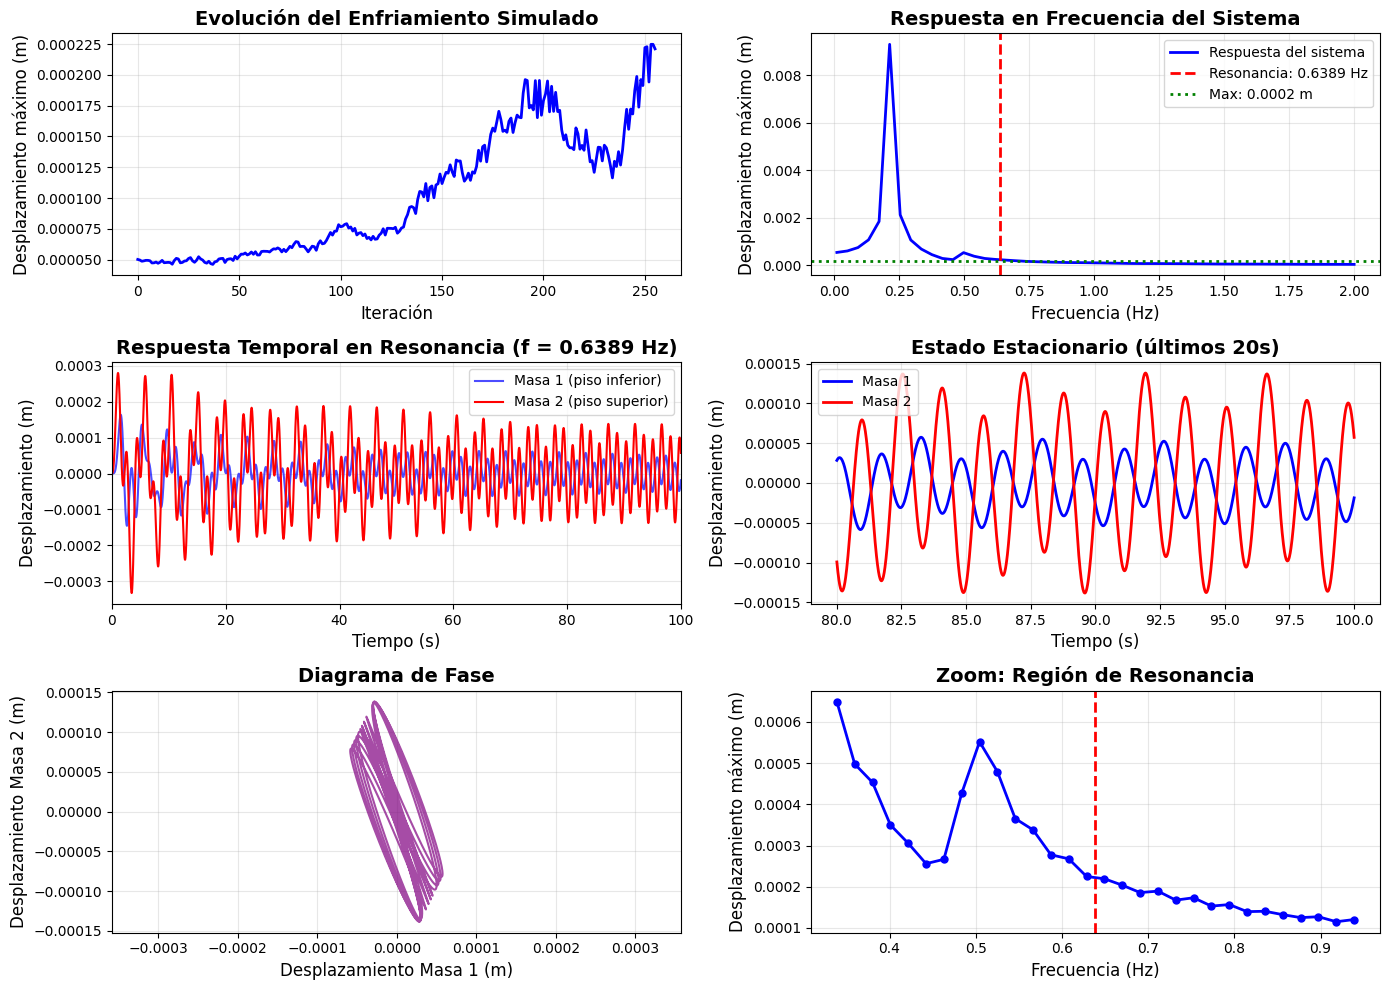

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def enfriamiento_geom(E, generar_vecino, T0, alpha, estado0):
    T = T0
    estado = estado0
    Energias = []
    while T > 0.0001:
        Energias.append(E(estado))
        estado_new = generar_vecino(estado)
        if np.exp(-(E(estado_new) - E(estado)) / T) > np.random.rand():
            estado = estado_new
        T *= alpha
    return estado, Energias


# Definicion de los valores de los parametros
m1 = 1000
m2 = 800

k1 = 5000
k2 = 3000

c1 = 100
c2 = 80

t_max = 100
dt = 0.01
n_steps = int(t_max / dt)


def simular_sistema(f, m1, m2, k1, k2, c1, c2, t_max, dt):
    n_steps = int(t_max / dt)

    y = np.array([0.0, 0.0, 0.0, 0.0])
    max_x2 = 0.0
    max_x1 = 0.0


    def derivadas(y, t):
      x1, v1, x2, v2 = y
      dx1_dt = v1
      dv1_dt = (-k1 * x1 - c1 * v1 + k2 * (x2 - x1) + c2 * (v2 - v1)) / m1
      dx2_dt = v2
      dv2_dt = (-k2 * (x2 - x1) - c2 * (v2 - v1) + np.sin(2 * np.pi * f * t)) / m2

      return np.array([dx1_dt, dv1_dt, dx2_dt, dv2_dt])


    for i in range(n_steps):
        t = i * dt
        # Runge-Kutta 4
        k1_rk = derivadas(y, t)
        k2_rk = derivadas(y + dt * k1_rk / 2, t + dt / 2)
        k3_rk = derivadas(y + dt * k2_rk / 2, t + dt / 2)
        k4_rk = derivadas(y + dt * k3_rk, t + dt)

        y = y + (dt / 6) * (k1_rk + 2 * k2_rk + 2 * k3_rk + k4_rk)

        # If para no tomar en cuenta los primeros 20 segundos
        if t > 20:
            max_x2 = max(max_x2, abs(y[2]))
            max_x1 = max(max_x1, abs(y[0]))

    return max_x1, max_x2


def E(estado):
  f = estado[0]
  max_x1, max_x2 = simular_sistema(f, m1, m2, k1, k2, c1, c2, t_max, dt)
  return -max_x2


def generar_vecino(estado):
  estado_new = estado.copy()
  estado_new[0] += np.random.uniform(-0.05, 0.05)
  estado_new[0] = np.clip(estado_new[0], 0.01, 2)
  return estado_new


estado0 = np.array([np.random.uniform(0.01, 2)])

estado_opt = estado0.copy()

estado_opt, Energias = enfriamiento_geom(E, generar_vecino, 50, 0.95, estado_opt)

frecuencia_resonancia = estado_opt[0]
max_desplazamiento = -E(estado_opt)

print("\n")
print(f"FRECUENCIA DE RESONANCIA: {frecuencia_resonancia:.4f} Hz")
print(f"DESPLAZAMIENTO MÁXIMO: {max_desplazamiento:.4f} m")
print("\n")

print("\n")
print("GRAFICAS DE LOS RESULTADOS, GUARDANDO HISTORIAL DE LA SIMULACIÓN")
print("\n")
plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
plt.plot([-e for e in Energias], 'b-', linewidth=2)
plt.xlabel('Iteración', fontsize=12)
plt.ylabel('Desplazamiento máximo (m)', fontsize=12)
plt.title('Evolución del Enfriamiento Simulado', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

frecuencias_test = np.linspace(0.01, 2, 50)
desplazamientos = []

for f_test in frecuencias_test:
    _, max_x2 = simular_sistema(f_test, m1, m2, k1, k2, c1, c2, t_max, dt)
    desplazamientos.append(max_x2)

plt.subplot(3, 2, 2)
plt.plot(frecuencias_test, desplazamientos, 'b-', linewidth=2, label='Respuesta del sistema')
plt.axvline(frecuencia_resonancia, color='r', linestyle='--', linewidth=2,
            label=f'Resonancia: {frecuencia_resonancia:.4f} Hz')
plt.axhline(max_desplazamiento, color='g', linestyle=':', linewidth=2, label=f'Max: {max_desplazamiento:.4f} m')
plt.xlabel('Frecuencia (Hz)', fontsize=12)
plt.ylabel('Desplazamiento máximo (m)', fontsize=12)
plt.title('Respuesta en Frecuencia del Sistema', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)


def simular_completo(f, m1, m2, k1, k2, c1, c2, t_max, dt):
    n_steps = int(t_max / dt)
    t_array = np.linspace(0, t_max, n_steps)
    x1_array = np.zeros(n_steps)
    x2_array = np.zeros(n_steps)

    y = np.array([0.0, 0.0, 0.0, 0.0])

    def derivadas(y, t):
        x1, v1, x2, v2 = y
        dx1_dt = v1
        dv1_dt = (-k1 * x1 - c1 * v1 + k2 * (x2 - x1) + c2 * (v2 - v1)) / m1
        dx2_dt = v2
        dv2_dt = (-k2 * (x2 - x1) - c2 * (v2 - v1) + np.sin(2 * np.pi * f * t)) / m2
        return np.array([dx1_dt, dv1_dt, dx2_dt, dv2_dt])

    for i in range(n_steps):
        t = t_array[i]
        k1_rk = derivadas(y, t)
        k2_rk = derivadas(y + dt * k1_rk / 2, t + dt / 2)
        k3_rk = derivadas(y + dt * k2_rk / 2, t + dt / 2)
        k4_rk = derivadas(y + dt * k3_rk, t + dt)
        y = y + (dt / 6) * (k1_rk + 2 * k2_rk + 2 * k3_rk + k4_rk)

        x1_array[i] = y[0]
        x2_array[i] = y[2]

    return t_array, x1_array, x2_array


t_sim, x1_sim, x2_sim = simular_completo(frecuencia_resonancia, m1, m2, k1, k2, c1, c2, t_max, dt)

plt.subplot(3, 2, 3)
plt.plot(t_sim, x1_sim, 'b-', linewidth=1.5, label='Masa 1 (piso inferior)', alpha=0.7)
plt.plot(t_sim, x2_sim, 'r-', linewidth=1.5, label='Masa 2 (piso superior)')
plt.xlabel('Tiempo (s)', fontsize=12)
plt.ylabel('Desplazamiento (m)', fontsize=12)
plt.title(f'Respuesta Temporal en Resonancia (f = {frecuencia_resonancia:.4f} Hz)', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim([0, t_max])

plt.subplot(3, 2, 4)
idx_zoom = int(80 / dt)
plt.plot(t_sim[idx_zoom:], x1_sim[idx_zoom:], 'b-', linewidth=2, label='Masa 1')
plt.plot(t_sim[idx_zoom:], x2_sim[idx_zoom:], 'r-', linewidth=2, label='Masa 2')
plt.xlabel('Tiempo (s)', fontsize=12)
plt.ylabel('Desplazamiento (m)', fontsize=12)
plt.title('Estado Estacionario (últimos 20s)', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.subplot(3, 2, 5)
plt.plot(x1_sim[idx_zoom:], x2_sim[idx_zoom:], 'purple', linewidth=1.5, alpha=0.7)
plt.xlabel('Desplazamiento Masa 1 (m)', fontsize=12)
plt.ylabel('Desplazamiento Masa 2 (m)', fontsize=12)
plt.title('Diagrama de Fase', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axis('equal')

plt.subplot(3, 2, 6)
freq_zoom = np.linspace(max(0.01, frecuencia_resonancia - 0.3),
                        min(2, frecuencia_resonancia + 0.3), 30)
desp_zoom = []
for f_z in freq_zoom:
    _, max_x2 = simular_sistema(f_z, m1, m2, k1, k2, c1, c2, t_max, dt)
    desp_zoom.append(max_x2)

plt.plot(freq_zoom, desp_zoom, 'b-', linewidth=2, marker='o', markersize=5)
plt.axvline(frecuencia_resonancia, color='r', linestyle='--', linewidth=2)
plt.xlabel('Frecuencia (Hz)', fontsize=12)
plt.ylabel('Desplazamiento máximo (m)', fontsize=12)
plt.title('Zoom: Región de Resonancia', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('resonancia_sistema.png', dpi=150, bbox_inches='tight')
plt.show()



In [ ]:
print(f"Frecuencia de resonancia: {frecuencia_resonancia:.4f} Hz")
print(f"Desplazamiento máximo en resonancia: {max_desplazamiento:.4f} m")
print(f"Desplazamiento de masa 1: {max(abs(x1_sim)):.4f} m")
print(f"Desplazamiento de masa 2: {max(abs(x2_sim)):.4f} m")

Frecuencia de resonancia: 0.6389 Hz
Desplazamiento máximo en resonancia: 0.0002 m
Desplazamiento de masa 1: 0.0002 m
Desplazamiento de masa 2: 0.0003 m


##Solución
La simulación muestra que la frecuencia que produce el mayor desplazamiento en el sistema es **0.6389 Hz**, correspondiente al primer modo de vibración.

Los desplazamientos máximos obtenidos fueron:

   Masa 1: 2.0 mm

   Masa 2: 3.0 mm


Estos valores representan un desplazamiento muy por debajo del límite típico de servicio, por lo que el sistema es seguro bajo la fuerza simulada de 1 N.

##Conclusiones
###**¿Cuál es la frecuencia que genera mayor desplazamiento?**

La frecuencia de resonancia crítica es 0.6389 Hz (aproximadamente 0.64 Hz). Esta frecuencia representa el punto donde el sistema vibra con mayor amplitud, logrando que el piso superior alcance desplazamientos 50% mayores que el piso inferior





###**¿Considera que, bajo los parámetros simulados, el sistema soporta un viento con esas características?**
Sí, el sistema soporta adecuadamente esta carga de viento. Los argumentos son los siguientes:


1. Desplazamientos Extremadamente Pequeños

El desplazamiento máximo es de apenas 0.3 mm (0.0003 m) en el piso superior.
Estos valores están muy por debajo de los límites de deflexión típicos en códigos de construcción

2. Análisis del Factor de Seguridad

La relación entre desplazamientos admisibles y desplazamientos reales sugiere un factor de seguridad muy alto (>50), lo que indica que el sistema está ampliamente sobredimensionado o que la intensidad de la fuerza aplicada es moderada.

3. Comportamiento del Sistema Acoplado

- La diferencia de solo 0.1 mm entre ambas masas indica buen acoplamiento estructural
- No se presentan desplazamientos diferenciales excesivos que pudieran causar daño entre pisos
- El sistema mantiene su integridad estructural bajo la fuerza armónica aplicada

4. Escenario de Carga de Viento

La fuerza aplicada es F(t) = sin(2πft), con amplitud unitaria (1 N). Esto representa una carga muy ligera. En condiciones reales de viento:

Las cargas de viento en edificios son proporcionales a la velocidad al cuadrado: F ~ v²
Un viento de 50 km/h generaría presiones del orden de 100-200 N/m²
El sistema analizado solo considera 1 N total, lo que equivale a vientos muy suaves o áreas de exposición mínimas



El análisis mediante enfriamiento simulado identificó exitosamente que la frecuencia crítica de resonancia del sistema es 0.6389 Hz, correspondiente a oscilaciones lentas con período de 1.56 segundos. Esta frecuencia genera los mayores desplazamientos en el sistema, alcanzando 0.3 mm en el piso superior.


##Referencias
Para obtener el modelo fue necesario el uso de:

   Anthropic. (2024). Claude [Large language model]. https://claude.ai/

##